### Loading and Inspecting the Data

In [1]:
import pandas as pd
filename = "files/002.csv"
df_all_data = pd.read_csv(filename)

In [2]:
df_all_data

,x,y
0,1846,21
1,1864,26
2,792,39
3,1281,23
4,522,44
5,1488,27
6,1061,25
7,1817,22
8,1914,28
9,1731,21


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

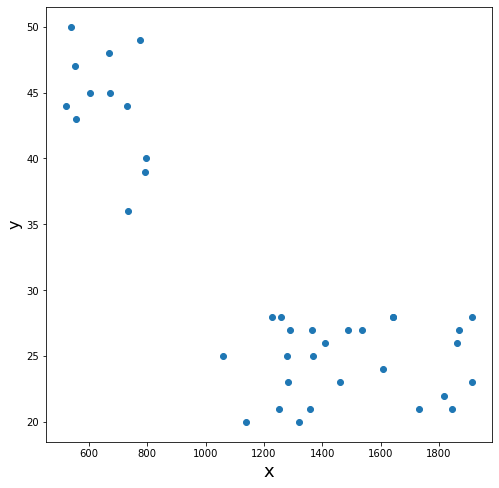

In [4]:
plt.rcParams["figure.figsize"] = (8,8) 
plt.scatter(df_all_data.x, df_all_data.y)
plt.xlabel('x', fontsize=18) 
plt.ylabel('y', fontsize=16) 

### Training and Deploying a K-Means model

In [5]:
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.Session()
role = get_execution_role()
bucket = session.default_bucket()

In [6]:
from sagemaker import KMeans

estimator = KMeans(role=role,
                   instance_count=1,
                   instance_type='ml.m5.xlarge',
                   k=2)

In [7]:
data_np = df_all_data.values.astype('float32')
record_set = estimator.record_set(data_np)

In [8]:
estimator.fit(record_set)

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-05-08 05:35:18 Starting - Starting the training job...
2021-05-08 05:35:42 Starting - Launching requested ML instancesProfilerReport-1620452118: InProgress
......
2021-05-08 05:36:47 Starting - Preparing the instances for training.........
2021-05-08 05:38:12 Downloading - Downloading input data
2021-05-08 05:38:12 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/08/2021 05:38:31 INFO 139691487835968] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'init_method': 'random', 'mini_batch_size': '5000', 'epochs': '1', 'extra_center_factor': 'auto', 'local_lloyd_max_iter': '300', 'local_lloyd_tol': '0.0001', 'local_lloyd_init_method': 'kmeans++', 'local_lloyd_num_trials': 'auto', 'half_life_time_size': '0', 'eval_metrics': '["msd"]', 'force_dense': 'true', '_disable_wait_to_read': 'false', '_enable_profiler': 'false', '_kvst

In [9]:
predictor = estimator.deploy(initial_instance_count=1,
                             instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------------------!

In [115]:
predictor.delete_endpoint()

In [82]:
results = predictor.predict(data_np)
results

[label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 0.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 316.9893493652344
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 0.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 334.9742431640625
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 50.264923095703125
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 0.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 248.0337677001953
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 labe

### Exercise # 1

**INSTRUCTION**: Prepare a DataFrame with the following columns

- x
- y
- closest_cluster



In [114]:
results[0].label.get('closest_cluster').float32_tensor.values[0]

0.0

In [99]:
def extract_closest_cluster(result):
    return result.label.get('closest_cluster').float32_tensor.values[0]

closest_cluster = list(map(extract_closest_cluster, results))

In [103]:
# init output DF
output_df = pd.DataFrame()

# populate DF
output_df['x'] = df_all_data.x
output_df['y'] = df_all_data.y
output_df['closest_cluster'] = closest_cluster

output_df.sample(5)

,x,y,closest_cluster
9,1731,21,0.0
7,1817,22,0.0
0,1846,21,0.0
5,1488,27,0.0
27,1461,23,0.0


### Exercise # 2

**INSTRUCTION**: Using the DataFrame from `Exercise # 1`, generate a scatter plot using `matplotlib` with the points from 1 cluster colored differently from the points in the 2nd cluster

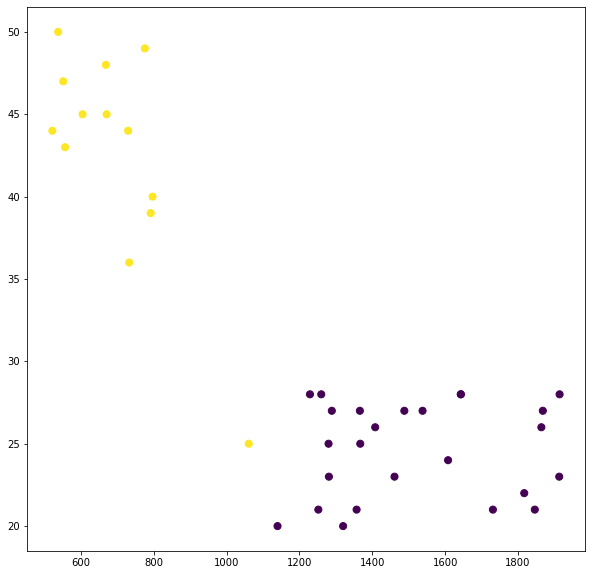

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(output_df.x, output_df.y, c=output_df.closest_cluster, s=50, cmap='viridis')